In [1]:
import h5py
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
fpath = '/gscratch/jisao/mclaret/GL64/Juin_Juillet/ik58_Rb_0p8_Rmin_2dx/'
tracks = []

f = h5py.File(fpath + 'eddy_tracks.mat')

# Arrange data into a list of dictionaries
data = f['tracks']            # relevant variables
varnames = list(f['tracks'])  # variable names
ntracks = len(data['x1'])     # number of tracks (should match with length of data in 'x1')

tracks = []
# add dictionaries for each variable to the corresponding eddy index (0 - N-1)
for itrack in range(ntracks):
    variables = {var:[] for var in varnames}  # initialize a dictionary with each variable name
    for var in varnames:
        # go through each variable
        if var[0:6] == 'shapes':
            # translate shapes data to list of numpy arrays (one array for each time step)
            coordinates = []                             # initialize list of coordinates
            numSteps = len(f[data[var][itrack,0]][(0)])  # number of timesteps
            # each timestep has its own hdf5 object reference, so append each step to a list
            for step in range(numSteps):
                coords = np.array(f[f[data[var][itrack,0]][(0, step)]])
                coordinates.append(coords)
            variables[var] = coordinates
        else:
            # translate data from hdf5 object reference to numpy array
            variables[var] = np.array(f[data[var][itrack,0]][(0)])
    tracks.append(variables)
    
print('Number of tracks:', len(tracks))

Number of tracks: 216


In [3]:
from scipy.io import netcdf
gridU = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m0607_gridU_ik58.nc','r')
gridV = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m0607_gridV_ik58.nc','r')
zetas = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m0607_zeta_ik58.nc','r')

lats = gridU.variables['nav_lat'][:][:].copy()        # latitude
lons = gridU.variables['nav_lon'][:][:].copy()        # longitude
print('lon lat', len(lons[0]), len(lats))

lon lat 377 170


In [4]:
# keep lowest values along each nav dimension, and verify nav resolution
lowest_lon = gridU.variables['nav_lon'][0, 0].copy()  # lowest longitude
lowest_lat = gridU.variables['nav_lat'][0, 0].copy()  # lowest latitude
nav_res = 1./64    # spatial resolution (in degrees)
dt = 1.0           # temporal resolution (in hours)
omega = 7.2921e-5

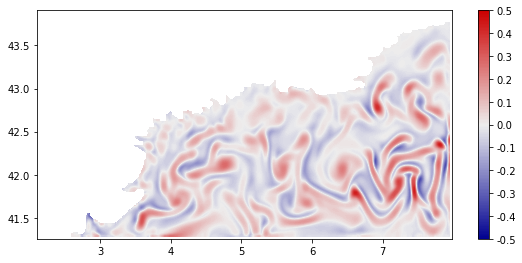

In [5]:
# test colormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm

cdict = {'red':  ((0.0, 0.0, 0.0),   # <- at 0.0, the red component is 0
                   (0.5, 0.93, 0.93),   # <- at 0.5, the red component is 1
                   (1.0, 1-0.2, 1-0.2)),  # <- at 1.0, the red component is 0

         'green': ((0.0, 0.0, 0.0),   # <- etc.
                   (0.5, 0.93, 0.93),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1-0.4353, 1-0.4353),
                   (0.5, 0.93, 0.93),
                   (1.0, 0.0, 0.0))
         }
blue_red = LinearSegmentedColormap('blue_red', cdict)

# set break intervals
breaks = np.linspace(-0.5,0.5,160)
bticks = np.linspace(-0.50,0.5,11)

zeta0 = zetas.variables['ZETA'][0][0][:][:].copy()
fig, ax = plt.subplots(figsize=(9.3, 4.2))
zeta0 = np.ma.masked_where(zeta0 == 0.0, zeta0)
zeta0_map = plt.contourf(lons, lats, zeta0, breaks, cmap=blue_red)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')
plt.colorbar(zeta0_map, format='%.1f', ticks=bticks)
plt.show()

In [6]:
from matplotlib import animation as anm
from IPython.display import HTML
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

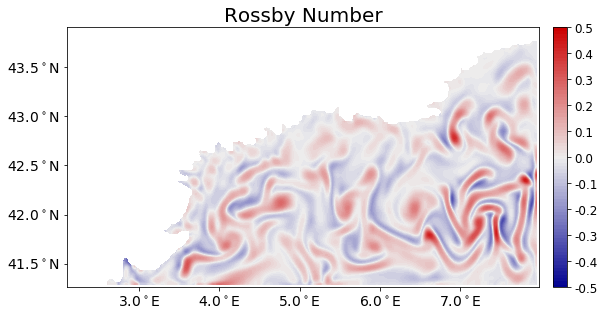

1
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436
441
446
451
456
461
466
471
476
481
486
491
496
501
506
511
516
521
526
531
536
541
546
551
556
561
566
571
576
581
586
591
596
601
606
611
616
621
626
631
636
641
646
651
656
661
666
671
676
681
686
691
696
701
706
711
716
721
726
731
736
741
746
751
756
761
766
saved!


In [12]:
arrowSep = 7
drawVectors = False
savePlot = True

fig_path = './figures/'
fname = 'map_noVectors.mp4'

fig, ax = plt.subplots(figsize=(8.5, 4.5))
zeta0 = zetas.variables['ZETA'][0][0][:][:].copy()
zeta0 = np.ma.masked_where(zeta0 == 0.0, zeta0)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')

# set break intervals
breaks = np.linspace(-0.5,0.5,80)
bticks = np.linspace(-0.50,0.5,11)
zeta0_map = plt.contourf(lons, lats, zeta0, breaks, cmap=blue_red)

# format lat/long labels
Elocs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in Elocs]
plt.xticks(Elocs[1:-1], Elabels[1:-1])
Nlocs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in Nlocs]
plt.yticks(Nlocs[1:-1], Nlabels[1:-1])

# Set the font name for axis tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
    
# figure labels
ax.set_title('Rossby Number', fontsize=20)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="3%")
plt.colorbar(zeta0_map, format='%.1f', ticks=bticks, cax=cax)
# Set the font name for axis tick labels
for tick in cax.get_yticklabels():
    tick.set_fontsize(12)
plt.tight_layout()
plt.pause(0.001)

def update(i):
    print(i)
    ax.set_title('Rossby Number at it = '+str(i), fontsize=20)
    
    [p.remove() for p in reversed(ax.patches)]  # remove old patches
    
    zeta = zetas.variables['ZETA'][i][0][:][:].copy()
    
    # mask land with white (value = 0.0)
    zeta = np.ma.masked_where(zeta == 0.0, zeta)
    cmap = plt.cm.OrRd
    cmap.set_bad(color='w')
    
    # update contour plot
    ax.contourf(lons, lats, zeta, breaks, cmap=blue_red)
    
    for j, track in enumerate(tracks):
        mask = np.argwhere(track['step']==i)
        if mask.size != 0:
            # this track is present at this step
            k = mask[0][0]
            ax.scatter(track['x1'][k], track['y1'][k], color='k', s=10)
            shape = track['shapes1'][k]
            patch = patches.Polygon(shape, fill=False, color='k')
            ax.add_patch(patch)
            
    if drawVectors:
        # draw vectors
        U = gridU.variables['vozocrtx'][i][0][:][:].copy()  # zonal velocity
        V = gridV.variables['vomecrty'][i][0][:][:].copy()  # meridional velocity
        U = np.ma.masked_where(U == 0.0, U)
        cmap = plt.cm.OrRd
        cmap.set_bad(color='w')
        V = np.ma.masked_where(V == 0.0, V)
        cmap = plt.cm.OrRd
        cmap.set_bad(color='w')
        ax.quiver(lons[::arrowSep,::arrowSep],
                  lats[::arrowSep,::arrowSep],
                  U[::arrowSep,::arrowSep],
                  V[::arrowSep,::arrowSep],
                  color=(0,0,0,.35), scale=3.5)
    plt.pause(0.001)
    
frames = np.arange(1,768, 5)
# frames = num of timesteps, interval = time btwn frames in ms
anim = anm.FuncAnimation(fig, update, frames=frames, interval=200)

if savePlot:
    # Set up formatting for the movie files
    anim.save(fig_path+fname, dpi=120)
    print('saved!')
#HTML(anim.to_jshtml())